In [55]:
from __future__ import absolute_import, division, print_function, unicode_literals
# Install TensorFlow using pip in conda environment , make sure to create py36 
# conda env create -n tf2_py36 python=3.6 anaconda to create the environment
# once created the environment conda activate tf2_py36 and then pip install TF2.0
# pip install tensorflow==2.0.0 

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, Callback , ModelCheckpoint
import os
import numpy as np
import matplotlib.pyplot as plt
import random

%matplotlib inline

In [2]:
tf.__version__

'2.0.0'

In [3]:
import numpy as np
X=np.load('X.npy')
X_std = X / 255.
y=np.load('y.npy')
X.shape,y.shape

((100, 150, 150, 3), (100,))

In [5]:
np.unique(y, return_counts=True)

(array([0, 1]), array([50, 50], dtype=int64))

In [18]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape, y_train.shape

11493376/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,))

In [46]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D , Dropout,MaxPooling2D
from tensorflow.keras import Model

model = Sequential([
    Conv2D(8, 3, padding='same', activation='relu', input_shape=(150, 150 ,3)),
    #MaxPooling2D(),
    #Dropout(0.2),
    Conv2D(8, 3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3,3)),
    Dropout(0.25),
    Conv2D(16, 3, padding='same', activation='relu'),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3,3)),
    Dropout(0.25),
    Conv2D(24, 3, padding='same', activation='relu'),
    Conv2D(24, 3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3,3)),
    Dropout(0.25),
    Flatten(),
    Dense(300, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [47]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()



Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_70 (Conv2D)           (None, 150, 150, 8)       224       
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 150, 150, 8)       584       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 50, 50, 8)         0         
_________________________________________________________________
dropout_47 (Dropout)         (None, 50, 50, 8)         0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 50, 50, 16)        1168      
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 50, 50, 16)        2320      
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 16, 16, 16)      

In [53]:

callbacks = [
        ModelCheckpoint(
        filepath='tf2_test.h5',
        # Path where to save the model
        # The two parameters below mean that we will overwrite
        # the current checkpoint if and only if
        # the `val_loss` score has improved.
        save_best_only=True,
        monitor='loss',
        verbose=1),
        EarlyStopping(monitor='loss',min_delta=1e-5, patience=5)
    
]
model.fit(x=X_std, y=y, epochs=100, shuffle=True, callbacks=callbacks )



Train on 100 samples
Epoch 1/100
 96/100 [===========================>..] - ETA: 0s - loss: 0.0341 - accuracy: 0.9896
Epoch 00001: loss improved from inf to 0.03283, saving model to tf2_test.h5
100/100 [==============================] - 1s 9ms/sample - loss: 0.0328 - accuracy: 0.9900
Epoch 2/100
 96/100 [===========================>..] - ETA: 0s - loss: 0.0118 - accuracy: 1.0000
Epoch 00002: loss improved from 0.03283 to 0.01135, saving model to tf2_test.h5
100/100 [==============================] - 1s 9ms/sample - loss: 0.0113 - accuracy: 1.0000
Epoch 3/100
 96/100 [===========================>..] - ETA: 0s - loss: 0.0178 - accuracy: 1.0000
Epoch 00003: loss did not improve from 0.01135
100/100 [==============================] - 1s 9ms/sample - loss: 0.0171 - accuracy: 1.0000
Epoch 4/100
 96/100 [===========================>..] - ETA: 0s - loss: 0.0057 - accuracy: 1.0000
Epoch 00004: loss improved from 0.01135 to 0.00555, saving model to tf2_test.h5
100/100 [==========================

In [64]:
from tensorflow.keras.models import load_model
loaded_model=load_model('tf2_test.h5')
loaded_model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_70 (Conv2D)           (None, 150, 150, 8)       224       
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 150, 150, 8)       584       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 50, 50, 8)         0         
_________________________________________________________________
dropout_47 (Dropout)         (None, 50, 50, 8)         0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 50, 50, 16)        1168      
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 50, 50, 16)        2320      
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 16, 16, 16)      

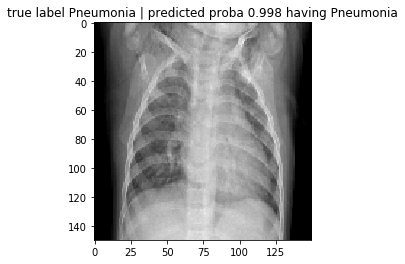

In [65]:
# use loaded model to make prediction
rn=random.randint(0,len(X)-1)
out=loaded_model.predict(X_std[rn].reshape(1,150,150,3))
true_label= 'Pneumonia' if y[rn]==1 else 'Normal'
plt.imshow(X[rn])
plt.title("true label {} | predicted proba {} having Pneumonia".format(true_label,str(round(out[0][0],3))))
plt.show()